<a href="https://colab.research.google.com/github/CamiloE/Proyectos-Personales/blob/master/Peces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar los datos desde kaggle

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"camilofarelo","key":"8d67e7e0e17ca788f2ecd4c3599f60fd"}'}

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d aungpyaeap/fish-market

  0% 0.00/2.39k [00:00<?, ?B/s]
100% 2.39k/2.39k [00:00<00:00, 1.16MB/s]


In [ ]:
!ls

fish-market.zip  kaggle.json  sample_data


In [ ]:
!unzip fish-market.zip

Archive:  fish-market.zip
  inflating: Fish.csv                


In [ ]:
!ls

Fish.csv  fish-market.zip  kaggle.json	sample_data


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
dataframe=pd.read_csv('Fish.csv')
dataframe.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


* Species: Nombre de la especie del pez
* Weight: Peso del pez en gramos
* Length1: Longitud vertical en cm
* Length2: Longitud diagonal en cm
* Length3: Longitud cruzada en cm
* Height: Altura en cm
* Width: Ancho diagonal en

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [ ]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


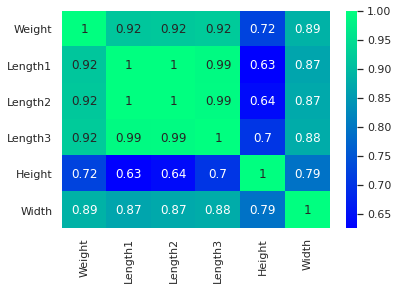

In [ ]:
corr=dataframe.corr()
sns.heatmap(data=corr,cmap='winter',annot=True)

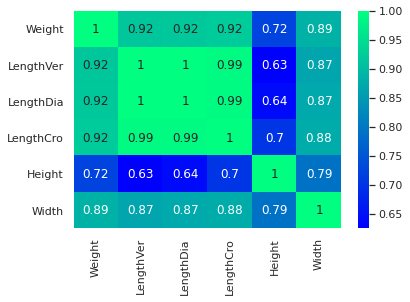

In [ ]:
dataframe.rename(columns={'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
corr=dataframe.corr()
sns.heatmap(data=corr,cmap='winter',annot=True)

## Eliminacion de valores atipicos

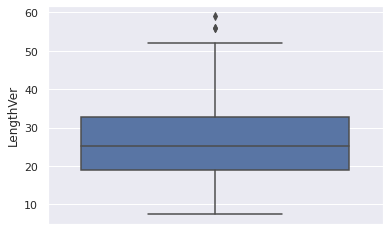

In [ ]:
sns.boxplot(y='LengthVer',data=dataframe)

In [ ]:
#Calculo del primer cuartil, tercer cuartil y la diiferencia intercuartil para los limites superior e inferior.
dfLVQ1=dataframe['LengthVer'].quantile(0.25)
dfLVQ3=dataframe['LengthVer'].quantile(0.75)
IQRLV=dfLVQ3-dfLVQ1
suplim=dfLVQ3+1.5*IQRLV
inflim=dfLVQ1-1.5*IQRLV
dataframe.loc[(dataframe.LengthVer<inflim) | (dataframe.LengthVer>suplim)]

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [ ]:
#Calculo del primer cuartil, tercer cuartil y la diiferencia intercuartil para los limites superior e inferior.
dfLDQ1=dataframe['LengthDia'].quantile(0.25)
dfLDQ3=dataframe['LengthDia'].quantile(0.75)
IQRLD=dfLDQ3-dfLDQ1
suplim=dfLDQ3+1.5*IQRLD
inflim=dfLDQ1-1.5*IQRLD
dataframe.loc[(dataframe.LengthDia<inflim) | (dataframe.LengthDia>suplim)]

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [ ]:
#Calculo del primer cuartil, tercer cuartil y la diiferencia intercuartil para los limites superior e inferior.
dfLCQ1=dataframe['LengthCro'].quantile(0.25)
dfLCQ3=dataframe['LengthCro'].quantile(0.75)
IQRLC=dfLCQ3-dfLCQ1
suplim=dfLCQ3+1.5*IQRLC
inflim=dfLCQ1-1.5*IQRLC
dataframe.loc[(dataframe.LengthCro<inflim) | (dataframe.LengthCro>suplim)]

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.48


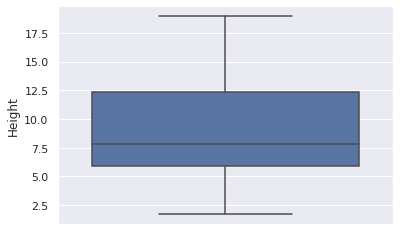

In [ ]:
sns.boxplot(y='Height',data=dataframe)

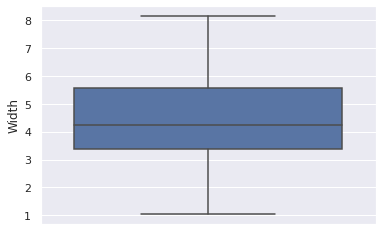

In [ ]:
sns.boxplot(y='Width',data=dataframe)

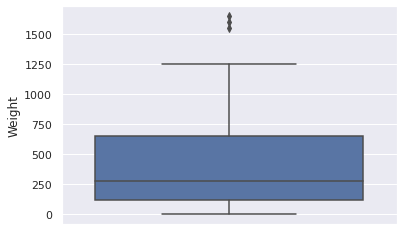

In [ ]:
sns.boxplot(y='Weight',data=dataframe)

In [ ]:
#Calculo del primer cuartil, tercer cuartil y la diiferencia intercuartil para los limites superior e inferior.
dfWQ1=dataframe['Weight'].quantile(0.25)
dfWQ3=dataframe['Weight'].quantile(0.75)
IQRW=dfWQ3-dfWQ1
suplim=dfWQ3+1.5*IQRW
inflim=dfWQ1-1.5*IQRW
dataframe.loc[(dataframe.Weight<inflim) | (dataframe.Weight>suplim)]

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [ ]:
dataframe.drop(index=[142,144,143], inplace=True)

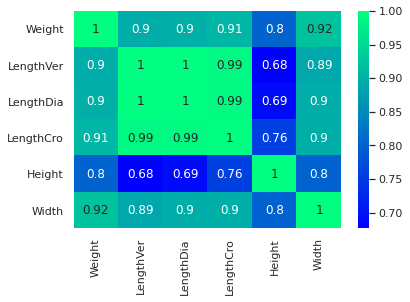

In [ ]:
#Mapa de correlacion para eliminar caracteristicas
corr=dataframe.corr()
sns.heatmap(data=corr,cmap='winter',annot=True)

In [ ]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


## Preprocesamiento de los datos

In [ ]:
X=dataframe.drop(columns=['Weight'])
y=dataframe['Weight']
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_trans=Pipeline(steps=[('ss',StandardScaler())])
ohe=OneHotEncoder(drop='first')
cat_trans=Pipeline(steps=[('ohe',ohe)])
cat_cols=X.select_dtypes(include='object').columns
num_cols=X.select_dtypes(exclude='object').columns
ct=ColumnTransformer(transformers=[('numtrans',num_trans,num_cols),
                                   ('cattrans',cat_trans,cat_cols)])

## Aplicando Regresion Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
modelo=Pipeline(steps=[('ct',ct),
                       ('lr',LinearRegression())])

In [ ]:
scores=cross_validate(modelo,X_train,y_train,cv=3,return_train_score=True,scoring='neg_mean_absolute_error')

In [ ]:
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [ ]:
print(f"MAE de entrenamiento: {-1*scores['train_score'].mean()}")
print(f"MAE de validacion: {-1*scores['test_score'].mean()}")

MAE de entrenamiento: 55.28308127288488
MAE de validacion: 73.70091104497668


In [ ]:
from sklearn.metrics import mean_absolute_error
modelo.fit(X_train,y_train)

In [ ]:
y_pred=modelo.predict(X_test)
mean_absolute_error(y_test,y_pred)

55.41292596809489

El error medio obtenido es bajo cual se puede considerar aceptable para la prediccion.